In [2]:
%matplotlib inline


In [1]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
exchange = pd.read_csv('external/extracted_exchange_rates.txt',header=None)

In [11]:
exchange2 = pd.read_csv('Data/autoformer_datasets/exchange_rate/exchange_rate.csv',header=None)

In [9]:
exchange.fillna()

ValueError: Must specify a fill 'value' or 'method'.

In [243]:
data_train = exchange[7][:int(len(exchange[7])*0.66)]
data_test = exchange[7][int(len(exchange[7])*0.66):].reset_index(drop=True)


seq_length = 36
pred_length = 96

sequences_train = [data_train[i:i+seq_length] for i in range(len(data_train)-seq_length-pred_length)]
target_train = [data_train[j+pred_length+seq_length] for j in range(len(data_train)-pred_length-seq_length)]
np_sequences_train = np.array(sequences_train).T
np_target_train = np.array(target_train)


sequences_test = [data_test[i:i+seq_length] for i in range(len(data_test)-seq_length-pred_length)]
target_test = [data_test[j+pred_length+seq_length] for j in range(len(data_test)-pred_length-seq_length)]
np_sequences_test = np.array(sequences_test).T
np_target_test = np.array(target_test)


X_train = torch.Tensor(np_sequences_train).T
y_train = torch.Tensor(np_target_train)[:,None]


X_test = torch.Tensor(np_sequences_test).T
y_test = torch.Tensor(np_target_test)[:,None]


tensor_dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(tensor_dataset,batch_size=1,shuffle = True)


tensor_dataset_test = TensorDataset(X_test, y_test)
dataloader_test = DataLoader(tensor_dataset_test,batch_size=100)

In [244]:
class LSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(36,1000),
            torch.nn.ReLU(),
            torch.nn.Linear(1000,1000),
            torch.nn.ReLU(),
            torch.nn.Linear(1000,1000),
            torch.nn.ReLU(),
            torch.nn.Linear(1000,1000),
            torch.nn.ReLU(),
            torch.nn.Linear(1000,1000),
            torch.nn.ReLU(),
            torch.nn.Linear(1000,1000),
            torch.nn.ReLU(),
            torch.nn.Linear(1000,100),
            torch.nn.ReLU(),
            torch.nn.Linear(100,1)
        )
        
    def forward(self,X):
        y_pred = self.main(X)
        return y_pred
    
    def predict(self,X):
        with torch.no_grad():
            y_pred = self.main(X)
        return y_pred
            
        

In [245]:
model = LSTM()

In [246]:
opt = torch.optim.Adadelta(model.parameters())
criterion = torch.nn.MSELoss()


In [250]:
for epoch in range(10):
    train_acc_list = []
    test_acc_list = []
    for batch, (X,y) in enumerate(dataloader):
        #print(f'Batch {batch}, Loss {loss}')
        opt.zero_grad()
        y_pred = model.forward(X)
        loss = criterion(y_pred,y)
        loss.backward()
        opt.step()
    
        if ((batch%50) == 0) or True:
            1+1
            #mae_batch = sum(torch.abs((y_pred-y)))/len(y)
            #y_test_pred = model.forward(X_test[:1000])

            #mse_test = sum((y_test_pred-y_test[:1000ii])**2)/1000

            print('Batch:',batch)#,' Training Accuracy:', mse_batch.item())
            #print('Testing Accuracy:',acc_test.item())
            #train_acc_list.append(mse_batch.item())
            #test_acc_list.append(mse_test.item())

    print(f'\n\nEpoch {epoch} \n\n')
    #print(sum(train_acc_list)/len(train_acc_list))

Batch: 0
Batch: 1
Batch: 2
Batch: 3
Batch: 4
Batch: 5
Batch: 6
Batch: 7
Batch: 8
Batch: 9
Batch: 10
Batch: 11
Batch: 12
Batch: 13
Batch: 14
Batch: 15
Batch: 16
Batch: 17
Batch: 18
Batch: 19
Batch: 20
Batch: 21
Batch: 22
Batch: 23
Batch: 24
Batch: 25
Batch: 26
Batch: 27
Batch: 28
Batch: 29
Batch: 30
Batch: 31
Batch: 32
Batch: 33
Batch: 34
Batch: 35
Batch: 36
Batch: 37
Batch: 38
Batch: 39
Batch: 40
Batch: 41
Batch: 42
Batch: 43
Batch: 44
Batch: 45
Batch: 46
Batch: 47
Batch: 48
Batch: 49
Batch: 50
Batch: 51
Batch: 52
Batch: 53
Batch: 54
Batch: 55
Batch: 56
Batch: 57
Batch: 58
Batch: 59
Batch: 60
Batch: 61
Batch: 62
Batch: 63
Batch: 64
Batch: 65
Batch: 66
Batch: 67
Batch: 68
Batch: 69
Batch: 70
Batch: 71
Batch: 72
Batch: 73
Batch: 74
Batch: 75
Batch: 76
Batch: 77
Batch: 78
Batch: 79
Batch: 80
Batch: 81
Batch: 82
Batch: 83
Batch: 84
Batch: 85
Batch: 86
Batch: 87
Batch: 88
Batch: 89
Batch: 90
Batch: 91
Batch: 92
Batch: 93
Batch: 94
Batch: 95
Batch: 96
Batch: 97
Batch: 98
Batch: 99
Batch: 100

KeyboardInterrupt: 

In [251]:
y_pred = model(X_train)


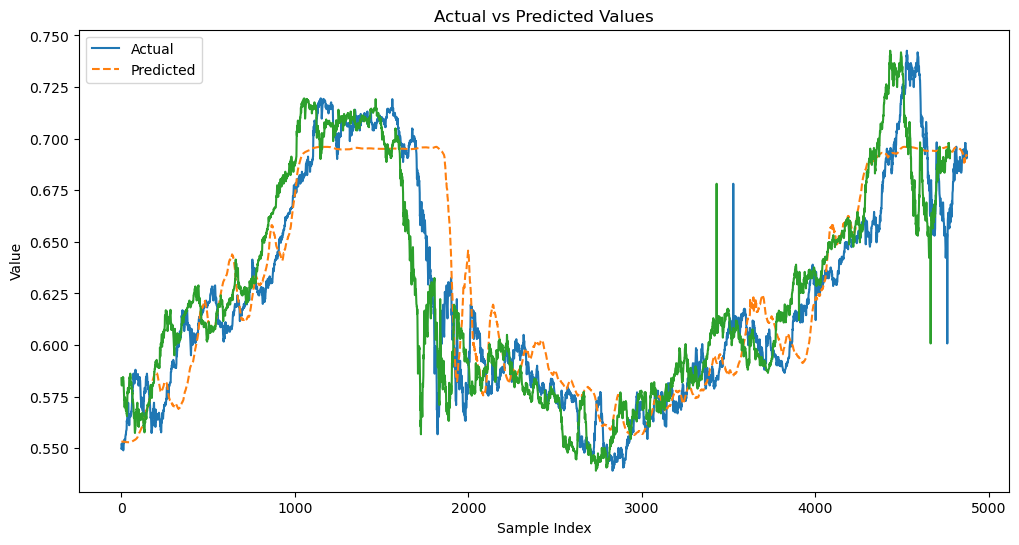

In [252]:
plt.figure(figsize=(12, 6))
plt.plot(y_train.detach(), label='Actual')
plt.plot(y_pred.detach(), label='Predicted', linestyle='--')
plt.plot(y_train[96:])
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

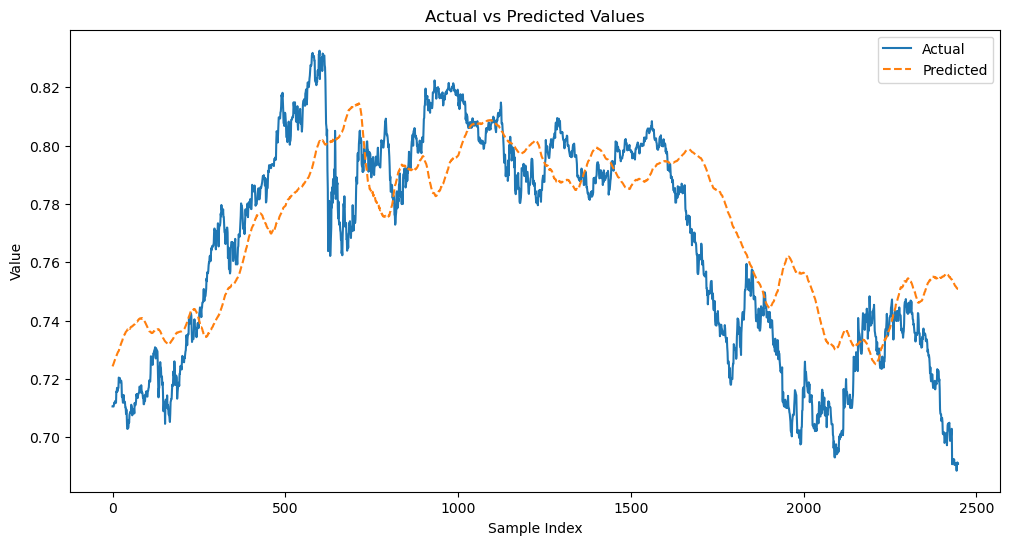

In [228]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.detach(), label='Actual')
plt.plot(y_pred.detach(), label='Predicted', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()